In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [5]:
dtype_dict = {
    'units_reimbursed': 'float',
    'number_of_prescriptions': 'float',
    'total_amount_reimbursed': 'float',
    'medicaid_amount_reimbursed': 'float',
    'non-medicaid_amount_reimbursed': 'float',
    'year': 'str',
    'quarter': 'str',
    'CountEnrolled': 'float',
    'poverty estimate, all ages': 'float',
    'poverty percent, all ages': 'float',
    'median household income': 'float',
    'quarteravg_nadac_per_unit': 'float',
    'quarteravg_generic_nadac_per_unit': 'float',
    'CPI': 'float',
    'MORTGAGE30US': 'float',
    'ndc': 'str',
    'product_name': 'str',
    'State Name': 'str',
    'Region': 'str',
    'ndc_description': 'str',
    'pricing_unit': 'str',
    'otc': 'str',
    'classification_for_rate_setting': 'str',
    'ndcpackagecode': 'str',
    'startmarketingdate': 'str',
    'producttypename': 'str',
    'proprietaryname': 'str',
    'nonproprietaryname': 'str',
    'dosageformname': 'str',
    'deaschedule': 'str',

}


In [7]:
df = pd.read_csv('combined.csv', dtype = dtype_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'combined.csv'

In [ ]:
df.head()

,Unnamed: 0,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,ndc,year,quarter,product_name,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,quarteravg_generic_nadac_per_unit,ndc_description,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,startmarketingdate,producttypename,proprietaryname,nonproprietaryname,dosageformname,routename,marketingcategoryname,labelername,substancename,deaschedule,CPI,GDP in billions,MORTGAGE30US
0,0,111.00000,28.00000,6120.24000,6120.24000,0.00000,00002010102,2020,1,AMMONIUM C,Tennessee,South,4671570.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.25467,"21,706,513",3.52154
1,1,213.00000,50.00000,6775.98000,6775.98000,0.00000,00002010102,2020,2,AMMONIUM C,Tennessee,South,4679388.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.86000,"19,913,143",3.23923
2,2,144.00000,77.00000,0.00000,0.00000,0.00000,00002010102,2020,3,AMMONIUM C,Tennessee,South,4810257.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.76633,"21,647,640",2.95231
3,3,126.00000,73.00000,0.00000,0.00000,0.00000,00002010102,2020,4,AMMONIUM C,Tennessee,South,4921383.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.36367,"22,024,502",2.76071
4,4,15.00000,15.00000,0.00000,0.00000,0.00000,00002010102,2021,1,AMMONIUM C,Tennessee,South,NaN,934856.00000,13.70000,59698.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.15767,"22,600,185",2.87583


In [ ]:
unemp_df = pd.read_csv('Unemployment by State.csv')

In [ ]:
unemp_df.rename(columns = {'Series ID':'State'}, inplace = True)

In [ ]:
replace_dict = {
    'LASST010000000000003': 'Alabama',
    'LASST020000000000003': 'Alaska',
    'LASST320000000000003': 'Nevada',
    'LASST330000000000003': 'New Hampshire',
    'LASST340000000000003': 'New Jersey',
    'LASST350000000000003': 'New Mexico',
    'LASST360000000000003': 'New York',
    'LASST370000000000003': 'North Carolina',
    'LASST380000000000003': 'North Dakota',
    'LASST390000000000003': 'Ohio',
    'LASST400000000000003': 'Oklahoma',
    'LASST410000000000003': 'Oregon',
    'LASST420000000000003': 'Pennsylvania',
    'LASST440000000000003': 'Rhode Island',
    'LASST450000000000003': 'South Carolina',
    'LASST460000000000003': 'South Dakota',
    'LASST470000000000003': 'Tennessee',
    'LASST480000000000003': 'Texas',
    'LASST490000000000003': 'Utah',
    'LASST500000000000003': 'Vermont',
    'LASST510000000000003': 'Virginia',
    'LASST530000000000003': 'Washington',
    'LASST540000000000003': 'West Virginia',
    'LASST550000000000003': 'Wisconsin',
    'LASST560000000000003': 'Wyoming',
    'LASST310000000000003': 'Nebraska',
    'LASST300000000000003': 'Montana',
    'LASST290000000000003': 'Missouri',
    'LASST160000000000003': 'Idaho',
    'LASST040000000000003': 'Arizona',
    'LASST050000000000003': 'Arkansas',
    'LASST060000000000003': 'California',
    'LASST080000000000003': 'Colorado',
    'LASST090000000000003': 'Connecticut',
    'LASST100000000000003': 'Delaware',
    'LASST110000000000003': 'Washington DC',
    'LASST120000000000003': 'Florida',
    'LASST130000000000003': 'Georgia',
    'LASST150000000000003': 'Hawaii',
    'LASST170000000000003': 'Illinois',
    'LASST280000000000003': 'Mississippi',
    'LASST180000000000003': 'Indiana',
    'LASST190000000000003': 'Iowa',
    'LASST200000000000003': 'Kansas',
    'LASST210000000000003': 'Kentucky',
    'LASST220000000000003': 'Louusiana',
    'LASST230000000000003': 'Maine',
    'LASST240000000000003': 'Maryland',
    'LASST250000000000003': 'Massachusetts',
    'LASST260000000000003': 'Michigan',
    'LASST270000000000003': 'Minnesota',
}

In [ ]:
unemp_df['State'] = unemp_df['State'].replace(replace_dict)
unemp_df.drop(unemp_df[unemp_df['State']=='LASST720000000000003'].index, inplace = True)
unemp_df['Month'] = pd.to_datetime(unemp_df['Label'])
unemp_df['Month'] = unemp_df['Month'].dt.to_period('m').dt.month
unemp_df['Label'] = pd.to_datetime(unemp_df['Label'])
unemp_df['Label'] = unemp_df['Label'].dt.to_period('Q')
unemp_df['state-quarter'] = unemp_df['State'].astype(str) + unemp_df['Label'].astype(str)
unemp_df.drop(columns = ['Year', 'Period', 'Label','State','Month'], inplace = True)
unemp_df.rename(columns= {'Value':'unemp_rate'}, inplace = True)

In [ ]:
unemp_df['unemp_rate'] = unemp_df['unemp_rate'].astype(float)

In [ ]:
df.loc[:, 'year-quarter'] = df.loc[:, 'year'].astype(str) + 'Q' + df.loc[:, 'quarter'].astype(str)

In [ ]:
df['state-quarter'] = df['State Name'] + df['year-quarter'].astype(str)

In [ ]:
# Group by 'state-quarter' and calculate the mean of 'unemp_rate'
unemp_quarter_avg_df = unemp_df.groupby('state-quarter')['unemp_rate'].mean().reset_index()
df = pd.merge(df, unemp_quarter_avg_df, on = 'state-quarter', how = 'left')

In [ ]:
df.head()

,Unnamed: 0,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,ndc,year,quarter,product_name,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,quarteravg_generic_nadac_per_unit,ndc_description,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,startmarketingdate,producttypename,proprietaryname,nonproprietaryname,dosageformname,routename,marketingcategoryname,labelername,substancename,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
0,0,111.00000,28.00000,6120.24000,6120.24000,0.00000,00002010102,2020,1,AMMONIUM C,Tennessee,South,4671570.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.25467,"21,706,513",3.52154,2020Q1,Tennessee2020Q1,3.50000
1,1,213.00000,50.00000,6775.98000,6775.98000,0.00000,00002010102,2020,2,AMMONIUM C,Tennessee,South,4679388.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.86000,"19,913,143",3.23923,2020Q2,Tennessee2020Q2,12.66667
2,2,144.00000,77.00000,0.00000,0.00000,0.00000,00002010102,2020,3,AMMONIUM C,Tennessee,South,4810257.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.76633,"21,647,640",2.95231,2020Q3,Tennessee2020Q3,7.93333
3,3,126.00000,73.00000,0.00000,0.00000,0.00000,00002010102,2020,4,AMMONIUM C,Tennessee,South,4921383.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.36367,"22,024,502",2.76071,2020Q4,Tennessee2020Q4,6.03333
4,4,15.00000,15.00000,0.00000,0.00000,0.00000,00002010102,2021,1,AMMONIUM C,Tennessee,South,NaN,934856.00000,13.70000,59698.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.15767,"22,600,185",2.87583,2021Q1,Tennessee2021Q1,5.26667


In [ ]:
df.shape

(9325402, 39)

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
df.drop(columns = ['ndc_description'], inplace = True)

In [ ]:
df.head()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,ndc,year,quarter,product_name,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,quarteravg_generic_nadac_per_unit,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,startmarketingdate,producttypename,proprietaryname,nonproprietaryname,dosageformname,routename,marketingcategoryname,labelername,substancename,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
0,111.00000,28.00000,6120.24000,6120.24000,0.00000,00002010102,2020,1,AMMONIUM C,Tennessee,South,4671570.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.25467,"21,706,513",3.52154,2020Q1,Tennessee2020Q1,3.50000
1,213.00000,50.00000,6775.98000,6775.98000,0.00000,00002010102,2020,2,AMMONIUM C,Tennessee,South,4679388.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.86000,"19,913,143",3.23923,2020Q2,Tennessee2020Q2,12.66667
2,144.00000,77.00000,0.00000,0.00000,0.00000,00002010102,2020,3,AMMONIUM C,Tennessee,South,4810257.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.76633,"21,647,640",2.95231,2020Q3,Tennessee2020Q3,7.93333
3,126.00000,73.00000,0.00000,0.00000,0.00000,00002010102,2020,4,AMMONIUM C,Tennessee,South,4921383.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.36367,"22,024,502",2.76071,2020Q4,Tennessee2020Q4,6.03333
4,15.00000,15.00000,0.00000,0.00000,0.00000,00002010102,2021,1,AMMONIUM C,Tennessee,South,NaN,934856.00000,13.70000,59698.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.15767,"22,600,185",2.87583,2021Q1,Tennessee2021Q1,5.26667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9325402 entries, 0 to 9325401
Data columns (total 37 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   units_reimbursed                   float64
 1   number_of_prescriptions            float64
 2   total_amount_reimbursed            float64
 3   medicaid_amount_reimbursed         float64
 4   non_medicaid_amount_reimbursed     float64
 5   ndc                                object 
 6   year                               object 
 7   quarter                            object 
 8   product_name                       object 
 9   State Name                         object 
 10  Region                             object 
 11  CountEnrolled                      float64
 12  poverty estimate, all ages         float64
 13  poverty percent, all ages          float64
 14  median household income            float64
 15  quarteravg_nadac_per_unit          float64
 16  quarteravg_generic

Nulls

In [ ]:
df.isna().sum()

units_reimbursed                           0
number_of_prescriptions                    0
total_amount_reimbursed                    0
medicaid_amount_reimbursed                 0
non_medicaid_amount_reimbursed             0
ndc                                        0
year                                       0
quarter                                    0
product_name                               0
State Name                                 0
Region                                     0
CountEnrolled                         233176
poverty estimate, all ages             82850
poverty percent, all ages              82850
median household income                82850
quarteravg_nadac_per_unit            2739426
quarteravg_generic_nadac_per_unit    9270000
pricing_unit                         2739426
otc                                  2739426
classification_for_rate_setting      2739426
ndcpackagecode                       1567787
startmarketingdate                   1567787
producttyp

In [ ]:
df.drop(columns = ('quarteravg_generic_nadac_per_unit'),inplace = True)

In [ ]:
df_null_packagecode = df[df['ndcpackagecode'].isna()]

In [ ]:
df_null_packagecode.head()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,ndc,year,quarter,product_name,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,startmarketingdate,producttypename,proprietaryname,nonproprietaryname,dosageformname,routename,marketingcategoryname,labelername,substancename,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
0,111.00000,28.00000,6120.24000,6120.24000,0.00000,00002010102,2020,1,AMMONIUM C,Tennessee,South,4671570.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.25467,"21,706,513",3.52154,2020Q1,Tennessee2020Q1,3.50000
1,213.00000,50.00000,6775.98000,6775.98000,0.00000,00002010102,2020,2,AMMONIUM C,Tennessee,South,4679388.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.86000,"19,913,143",3.23923,2020Q2,Tennessee2020Q2,12.66667
2,144.00000,77.00000,0.00000,0.00000,0.00000,00002010102,2020,3,AMMONIUM C,Tennessee,South,4810257.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.76633,"21,647,640",2.95231,2020Q3,Tennessee2020Q3,7.93333
3,126.00000,73.00000,0.00000,0.00000,0.00000,00002010102,2020,4,AMMONIUM C,Tennessee,South,4921383.00000,911097.00000,13.60000,56962.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.36367,"22,024,502",2.76071,2020Q4,Tennessee2020Q4,6.03333
4,15.00000,15.00000,0.00000,0.00000,0.00000,00002010102,2021,1,AMMONIUM C,Tennessee,South,NaN,934856.00000,13.70000,59698.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.15767,"22,600,185",2.87583,2021Q1,Tennessee2021Q1,5.26667


In [ ]:
df_cleaned = df[df['ndcpackagecode'].notna()]


In [ ]:
df_cleaned = df_cleaned[df_cleaned['poverty estimate, all ages'].notna()]

In [ ]:
average_prices = df_cleaned.groupby(['product_name', 'year'])['quarteravg_nadac_per_unit'].mean()

# Fill NaN values with the corresponding average price
df_cleaned['quarteravg_nadac_per_unit'] = df_cleaned.apply(lambda row: average_prices[row['product_name'], row['year']]
                                        if pd.isna(row['quarteravg_nadac_per_unit']) else row['quarteravg_nadac_per_unit'], axis=1)

In [ ]:
average_prices = df_cleaned.groupby(['product_name'])['quarteravg_nadac_per_unit'].mean()

# Fill NaN values with the corresponding average price
df_cleaned['quarteravg_nadac_per_unit'] = df_cleaned.apply(lambda row: average_prices[row['product_name']]
                                        if pd.isna(row['quarteravg_nadac_per_unit']) else row['quarteravg_nadac_per_unit'], axis=1)

In [ ]:
df_cleaned = df_cleaned[df_cleaned['quarteravg_nadac_per_unit'].notna()]

In [ ]:
def fill_missing_with_mode(group):
    mode = group.mode()
    if not mode.empty:
        return mode.iloc[0]
    else:
        return None

# Group by 'product_name' and 'year', then apply the function to fill missing values
mode_by_group = df_cleaned.groupby(['product_name'])['pricing_unit'].apply(fill_missing_with_mode)

# Fill missing values in 'pricing_unit' with the mode for each group
df_cleaned['pricing_unit'] = df_cleaned.apply(lambda row: mode_by_group[row['product_name']]
                                              if pd.isna(row['pricing_unit']) and row['product_name'] in mode_by_group
                                              else row['pricing_unit'], axis=1)


In [ ]:
# Group by 'product_name' and 'year', then apply the function to fill missing values
mode_by_group = df_cleaned.groupby(['product_name'])['otc'].apply(fill_missing_with_mode)

# Fill missing values in 'otc' with the mode for each group
df_cleaned['otc'] = df_cleaned.apply(lambda row: mode_by_group[row['product_name']]
                                              if pd.isna(row['otc']) and row['product_name'] in mode_by_group
                                              else row['otc'], axis=1)


In [ ]:
# Group by 'product_name' and 'year', then apply the function to fill missing values
mode_by_group = df_cleaned.groupby(['product_name'])['classification_for_rate_setting'].apply(fill_missing_with_mode)

# Fill missing values in 'otc' with the mode for each group
df_cleaned['classification_for_rate_setting'] = df_cleaned.apply(lambda row: mode_by_group[row['product_name']]
                                              if pd.isna(row['classification_for_rate_setting']) and row['product_name'] in mode_by_group
                                              else row['classification_for_rate_setting'], axis=1)

In [ ]:
df_enrolled = df_cleaned[df_cleaned['CountEnrolled'].isna()]

In [ ]:
average_enrolled = df_cleaned.groupby(['State Name'])['year'].mean()

# Fill NaN values with the corresponding average price
df_cleaned['CountEnrolled'] = df_cleaned.apply(lambda row: average_enrolled[row['State Name']]
                                        if pd.isna(row['CountEnrolled']) else row['CountEnrolled'], axis=1)


In [ ]:
# Group by 'product_name' and 'year', then apply the function to fill missing values
mode_by_group = df_cleaned.groupby(['product_name'])['routename'].apply(fill_missing_with_mode)

# Fill missing values in 'otc' with the mode for each group
df_cleaned['routename'] = df_cleaned.apply(lambda row: mode_by_group[row['product_name']]
                                              if pd.isna(row['routename']) and row['product_name'] in mode_by_group
                                              else row['routename'], axis=1)

In [ ]:
# Group by 'product_name' and 'year', then apply the function to fill missing values
mode_by_group = df_cleaned.groupby(['ndc'])['routename'].apply(fill_missing_with_mode)

# Fill missing values in 'otc' with the mode for each group
df_cleaned['routename'] = df_cleaned.apply(lambda row: mode_by_group[row['ndc']]
                                              if pd.isna(row['routename']) and row['ndc'] in mode_by_group
                                              else row['routename'], axis=1)

In [ ]:
df_cleaned = df_cleaned[df_cleaned['routename'].notna()]

In [ ]:
df_cleaned.drop(columns = ['substancename'], inplace = True)

In [ ]:
df_cleaned['deaschedule'] = df_cleaned.apply(lambda row: 'Not Controlled'
                                            if pd.isna(row['deaschedule'])
                                            else row['deaschedule'], axis = 1)

In [ ]:
nums = df_cleaned.select_dtypes(include=['number']).columns.tolist()

for column in nums:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Select the outliers
    upper_outliers = df_cleaned[(df_cleaned[column] > upper_bound)]

    print(column, ' has ', upper_outliers.shape[0], ' outliers.')


units_reimbursed  has  684222  outliers.
number_of_prescriptions  has  653332  outliers.
total_amount_reimbursed  has  724513  outliers.
medicaid_amount_reimbursed  has  723231  outliers.
non_medicaid_amount_reimbursed  has  962902  outliers.
CountEnrolled  has  386267  outliers.
poverty estimate, all ages  has  264340  outliers.
poverty percent, all ages  has  0  outliers.
median household income  has  0  outliers.
quarteravg_nadac_per_unit  has  1003380  outliers.
CPI  has  0  outliers.
MORTGAGE30US  has  0  outliers.
unemp_rate  has  299985  outliers.


In [ ]:
Q1 = df_cleaned['units_reimbursed'].quantile(0.25)
Q3 = df_cleaned['units_reimbursed'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the upper bound for outliers
upper_bound = Q3 + 3 * IQR

# Step 3: Select the upper outliers
upper_outliers = df_cleaned[df_cleaned['units_reimbursed'] > upper_bound]

upper_outliers.head()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,ndc,year,quarter,product_name,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,startmarketingdate,producttypename,proprietaryname,nonproprietaryname,dosageformname,routename,marketingcategoryname,labelername,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
248,47679.50000,19553.00000,20524697.40000,20324103.33000,200594.07000,00002143380,2022,2,TRULICITY,California,West,42485597.00000,4673718.00000,12.20000,91517.00000,366.66709,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,292.57200,"25,544,273",5.26615,2022Q2,California2022Q2,4.00000
249,63956.00000,25424.00000,27518829.18000,27258802.97000,260026.21000,00002143380,2022,3,TRULICITY,California,West,43292868.00000,4673718.00000,12.20000,91517.00000,366.66709,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,296.41833,"25,994,639",5.62308,2022Q3,California2022Q3,3.86667
250,52527.00000,20755.00000,22600310.16000,22368451.88000,231858.28000,00002143380,2022,4,TRULICITY,California,West,44036767.00000,4673718.00000,12.20000,91517.00000,366.66709,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,297.50667,"26,408,405",6.66462,2022Q4,California2022Q4,4.10000
1365,50396.50000,20233.00000,21688678.17000,21446261.26000,242416.91000,00002143480,2022,2,TRULICITY,California,West,42485597.00000,4673718.00000,12.20000,91517.00000,366.66709,ML,N,B,0002-1434-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,292.57200,"25,544,273",5.26615,2022Q2,California2022Q2,4.00000
1366,66427.00000,25606.00000,28567948.34000,28231260.43000,336687.91000,00002143480,2022,3,TRULICITY,California,West,43292868.00000,4673718.00000,12.20000,91517.00000,366.66709,ML,N,B,0002-1434-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,296.41833,"25,994,639",5.62308,2022Q3,California2022Q3,3.86667


In [ ]:
upper_outliers['State Name'].value_counts()

California        62022
New York          56918
Ohio              38069
Pennsylvania      35091
Michigan          30403
Texas             28380
Florida           26278
Illinois          26227
Kentucky          24666
New Jersey        19751
Louisiana         19425
Indiana           19420
North Carolina    17892
Virginia          17859
Arizona           17742
Washington        17363
Massachusetts     17055
Georgia           16589
Wisconsin         15201
Maryland          14995
Minnesota         14094
Tennessee         13380
Missouri          13148
Connecticut       11268
Oregon            11173
Colorado          11031
West Virginia      9461
Alabama            7857
Iowa               7291
South Carolina     6818
Oklahoma           6595
Nevada             5839
New Mexico         5715
Mississippi        5483
Arkansas           5200
Rhode Island       3524
Kansas             3146
Maine              3027
Nebraska           2841
Utah               2618
Idaho              2496
Hawaii          

In [ ]:
df_cleaned.drop(columns = ['non_medicaid_amount_reimbursed'], inplace = True)

In [ ]:
def find_outliers(var):
    column = var

    # Calculate quartiles and IQR
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Select the outliers
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]

    return outliers


In [ ]:
units_outliers = find_outliers('units_reimbursed')

In [ ]:
correlation = units_outliers['units_reimbursed'].corr(units_outliers['number_of_prescriptions'])
print("Correlation coefficient between units reimbursed and number of prescriptions:", correlation)


Correlation coefficient between units reimbursed and number of prescriptions: 0.3479530144883848


Moderate positive relationship could indicated

In [ ]:
units_outliers_pivot = units_outliers.pivot_table(index='product_name', values=['units_reimbursed', 'number_of_prescriptions'], aggfunc='sum')

In [ ]:
correlation = units_outliers_pivot['units_reimbursed'].corr(units_outliers_pivot['number_of_prescriptions'])
print("Correlation coefficient between units reimbursed and number of prescriptions:", correlation)


Correlation coefficient between units reimbursed and number of prescriptions: 0.7369855963520222


High correlation between sum of units reimbursed and number of prescriptions by product name indiciating that the outliers are potentially high use drugs and are reflective of what is happening in the medicaid space

In [ ]:
enrolled_outliers = find_outliers('CountEnrolled')

In [ ]:
enrolled_outliers['State Name'].value_counts()

New York        274915
California      264340
Kentucky         91661
Texas            75759
Florida          43068
Rhode Island     21727
Tennessee         8539
Name: State Name, dtype: int64

states with infinite values in count enrolled: Kentucky, Tennessee, Rhode Island -- drop these records

In [ ]:
df_cleaned_states = df_cleaned[df_cleaned['State Name']== 'Kentucky']

In [ ]:
grouped = df_cleaned.groupby(['State Name', 'year'])

# Filter out non-numeric columns
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate the average of non-infinite values for each group
avg_values = grouped[numeric_columns].apply(lambda x: np.nanmean(x.replace([np.inf, -np.inf], np.nan)))

# Replace infinite values with average of non-infinite values for each group
for idx, group_df in grouped:
    infinite_mask = (group_df == np.inf) | (group_df == -np.inf)
    if infinite_mask.any().any():
        avg_value = avg_values.loc[idx]
        df_cleaned.loc[group_df.index, numeric_columns] = group_df.mask(infinite_mask, avg_value)


In [ ]:
enrolled_outliers = find_outliers('CountEnrolled')

In [ ]:
enrolled_outliers['State Name'].value_counts()

New York      274915
California    264340
Texas          95542
Florida        83169
Name: State Name, dtype: int64

The outliers for the enrolled counts are the four states with the biggest populations, therefore it is expected that they would have higher populations than other states

In [ ]:
povertyest_outliers = find_outliers('poverty estimate, all ages')

In [ ]:
povertyest_outliers['State Name'].value_counts()

California    264340
Texas         190548
Florida        71441
Name: State Name, dtype: int64

poverty estimates that are outliers are the same as 3 of the 4 biggest states and also 3 of the 4 enrolled outliers

In [ ]:
povertypercent_outliers = find_outliers('poverty percent, all ages')

In [ ]:
povertypercent_outliers['State Name'].value_counts()

Mississippi    98781
Louisiana      37639
Name: State Name, dtype: int64

poverty percent outliers are two of the poorest states in America

In [ ]:
correlation = povertyest_outliers['median household income'].corr(povertyest_outliers['poverty estimate, all ages'])
print("Correlation coefficient between median income and poverty estimate:", correlation)

Correlation coefficient between median income and poverty estimate: 0.7722171847506542


In [ ]:
correlation = povertypercent_outliers['median household income'].corr(povertypercent_outliers['poverty estimate, all ages'])
print("Correlation coefficient between median income and poverty percent:", correlation)

Correlation coefficient between median income and poverty percent: 0.4762493323420352


In [ ]:
nadac_outliers = find_outliers('quarteravg_nadac_per_unit')

In [ ]:
nadac_outliers.head()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,ndc,year,quarter,product_name,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,startmarketingdate,producttypename,proprietaryname,nonproprietaryname,dosageformname,routename,marketingcategoryname,labelername,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
158,529.00000,266.00000,182722.25000,176283.45000,00002143380,2018,1,TRULICITY,Alabama,South,2908730.00000,801758.00000,16.80000,49881.00000,350.84377,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,248.80400,"20,328,553",4.28231,2018Q1,Alabama2018Q1,4.00000
159,593.00000,300.00000,216686.64000,212258.81000,00002143380,2018,2,TRULICITY,Alabama,South,2914456.00000,801758.00000,16.80000,49881.00000,350.76266,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,251.37433,"20,580,912",4.54462,2018Q2,Alabama2018Q2,4.00000
160,669.00000,342.00000,247783.49000,239172.49000,00002143380,2018,3,TRULICITY,Alabama,South,2921170.00000,801758.00000,16.80000,49881.00000,350.76266,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,252.19700,"20,798,730",4.56692,2018Q3,Alabama2018Q3,3.93333
161,767.00000,391.00000,277025.81000,270786.46000,00002143380,2018,4,TRULICITY,Alabama,South,2918669.00000,801758.00000,16.80000,49881.00000,351.01713,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,252.05200,"20,917,867",4.78462,2018Q4,Alabama2018Q4,3.83333
162,924.50000,466.00000,339723.44000,330922.88000,00002143380,2019,1,TRULICITY,Alabama,South,2930261.00000,747478.00000,15.60000,51771.00000,364.48954,ML,N,B,0002-1433-80,1970Q1,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,252.89667,"21,104,133",4.37385,2019Q1,Alabama2019Q1,3.56667


all outliers are distributed amoung years

In [ ]:
"""categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Plot value count distributions for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cleaned, x=column, order=df_cleaned[column].value_counts().index)
    plt.title(f'Value Count Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()"""

"categorical_columns = df_cleaned.select_dtypes(include=['object']).columns\n\n# Plot value count distributions for each categorical variable\nfor column in categorical_columns:\n    plt.figure(figsize=(10, 6))\n    sns.countplot(data=df_cleaned, x=column, order=df_cleaned[column].value_counts().index)\n    plt.title(f'Value Count Distribution of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Count')\n    plt.xticks(rotation=45, ha='right')\n    plt.tight_layout()\n    plt.show()"

In [ ]:
df_cleaned.drop(columns = ['medicaid_amount_reimbursed', 'startmarketingdate'],inplace = True)

In [ ]:
df_cleaned.drop(columns=['product_name'], inplace = True)

In [ ]:
df_cleaned.drop(columns = ['nonproprietaryname'],inplace = True)

In [ ]:
df_cleaned.head()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,ndc,year,quarter,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,producttypename,proprietaryname,dosageformname,routename,marketingcategoryname,labelername,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
158,529.00000,266.00000,182722.25000,00002143380,2018,1,Alabama,South,2908730.00000,801758.00000,16.80000,49881.00000,350.84377,ML,N,B,0002-1433-80,HUMAN PRESCRIPTION DRUG,Trulicity,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,248.80400,"20,328,553",4.28231,2018Q1,Alabama2018Q1,4.00000
159,593.00000,300.00000,216686.64000,00002143380,2018,2,Alabama,South,2914456.00000,801758.00000,16.80000,49881.00000,350.76266,ML,N,B,0002-1433-80,HUMAN PRESCRIPTION DRUG,Trulicity,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,251.37433,"20,580,912",4.54462,2018Q2,Alabama2018Q2,4.00000
160,669.00000,342.00000,247783.49000,00002143380,2018,3,Alabama,South,2921170.00000,801758.00000,16.80000,49881.00000,350.76266,ML,N,B,0002-1433-80,HUMAN PRESCRIPTION DRUG,Trulicity,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,252.19700,"20,798,730",4.56692,2018Q3,Alabama2018Q3,3.93333
161,767.00000,391.00000,277025.81000,00002143380,2018,4,Alabama,South,2918669.00000,801758.00000,16.80000,49881.00000,351.01713,ML,N,B,0002-1433-80,HUMAN PRESCRIPTION DRUG,Trulicity,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,252.05200,"20,917,867",4.78462,2018Q4,Alabama2018Q4,3.83333
162,924.50000,466.00000,339723.44000,00002143380,2019,1,Alabama,South,2930261.00000,747478.00000,15.60000,51771.00000,364.48954,ML,N,B,0002-1433-80,HUMAN PRESCRIPTION DRUG,Trulicity,"INJECTION, SOLUTION",SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,252.89667,"21,104,133",4.37385,2019Q1,Alabama2019Q1,3.56667


In [ ]:
df_cleaned.drop(columns= ['ndc'], inplace = True)

In [ ]:
df_cleaned.drop(columns= ['year', 'quarter'], inplace = True)

In [ ]:
"""numerical_columns = df_cleaned.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df_cleaned[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()"""


"numerical_columns = df_cleaned.select_dtypes(include='number').columns\n\nfor column in numerical_columns:\n    plt.figure(figsize=(10, 6))\n    plt.hist(df_cleaned[column], bins=30, color='skyblue', edgecolor='black')\n    plt.title(f'Distribution of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Frequency')\n    plt.grid(True)\n    plt.show()"

In [ ]:
df_cleaned.describe()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,CPI,MORTGAGE30US,unemp_rate
count,7143769.00000,7143769.00000,7143769.00000,7143769.00000,7143769.00000,7143769.00000,7143769.00000,7143769.00000,7143769.00000,7143769.00000,6969553.00000
mean,25394.90588,438.25656,35531.27538,6485109.37827,1058251.09436,12.44742,68029.00535,22.86662,267.50252,3.99270,4.70627
std,221722.76811,2258.92642,409570.34344,7858988.11729,1077207.08586,2.56557,11868.62050,445.91251,15.81774,1.07303,2.42778
min,0.00100,11.00000,0.00000,20394.54936,52418.00000,7.00000,44038.00000,0.00146,248.80400,2.76071,1.93333
25%,1009.00000,26.00000,514.40000,2332442.00000,386739.00000,10.40000,59246.00000,0.08156,255.92767,3.00385,3.30000
50%,3096.00000,71.00000,1800.12000,4366256.00000,731216.00000,12.20000,66318.00000,0.20654,260.36367,3.70000,4.00000
75%,11715.00000,249.00000,7224.29000,7268774.00000,1351159.00000,13.80000,76471.00000,0.82131,277.77967,4.56692,5.06667
max,76579740.00000,531460.00000,111173352.95000,44036767.00000,4972955.00000,19.80000,96341.00000,24599.05556,297.50667,6.66462,24.70000


In [ ]:
"""for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()"""

"for column in numerical_columns:\n    plt.figure(figsize=(8, 6))\n    plt.boxplot(df_cleaned[column])\n    plt.title(f'Boxplot of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Values')\n    plt.grid(True)\n    plt.show()"

In [ ]:
"""categorical_columns = df_cleaned.select_dtypes(include='object').columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cleaned, x=column, order=df_cleaned[column].value_counts().index)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks([])
    plt.tight_layout()
    plt.show()"""

"categorical_columns = df_cleaned.select_dtypes(include='object').columns\n\nfor column in categorical_columns:\n    plt.figure(figsize=(10, 6))\n    sns.countplot(data=df_cleaned, x=column, order=df_cleaned[column].value_counts().index)\n    plt.title(f'Countplot of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Count')\n    plt.xticks([])\n    plt.tight_layout()\n    plt.show()"

In [ ]:
df_encoded =df_cleaned.copy()

categorical_columns = df_encoded.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Iterate oveer each categorical column and apply label encoding
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

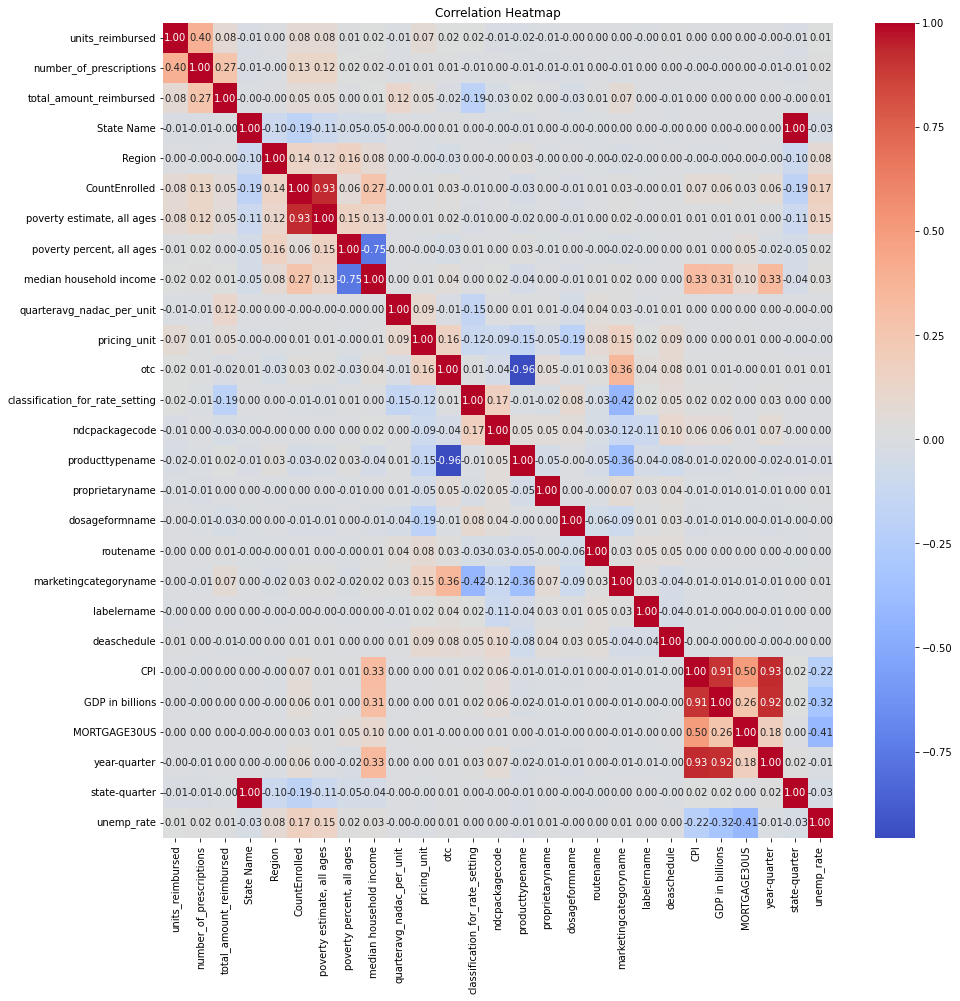

In [ ]:
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 1: Calculate lower and upper bounds for outliers
Q1 = df_cleaned[['units_reimbursed', 'total_amount_reimbursed', 'number_of_prescriptions', 'quarteravg_nadac_per_unit']].quantile(0.25)
Q3 = df_cleaned[['units_reimbursed', 'total_amount_reimbursed', 'number_of_prescriptions', 'quarteravg_nadac_per_unit']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Step 2: Filter the original DataFrame to keep only rows without outliers
df_no_outliers = df_cleaned[
    (df_cleaned['units_reimbursed'] >= lower_bound['units_reimbursed']) &
    (df_cleaned['units_reimbursed'] <= upper_bound['units_reimbursed']) &
    (df_cleaned['total_amount_reimbursed'] >= lower_bound['total_amount_reimbursed']) &
    (df_cleaned['total_amount_reimbursed'] <= upper_bound['total_amount_reimbursed']) &
    (df_cleaned['number_of_prescriptions'] >= lower_bound['number_of_prescriptions']) &
    (df_cleaned['number_of_prescriptions'] <= upper_bound['number_of_prescriptions'])&
    (df_cleaned['quarteravg_nadac_per_unit'] >= lower_bound['quarteravg_nadac_per_unit']) &
    (df_cleaned['quarteravg_nadac_per_unit'] <= upper_bound['quarteravg_nadac_per_unit'])
]


In [ ]:
df_no_outliers = df_no_outliers[df_cleaned['units_reimbursed'] >= 300]

/var/folders/lf/2w97dh191txdbq0mypdjfc7w0000gn/T/ipykernel_74766/2501582626.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[df_cleaned['units_reimbursed'] >= 300]


In [ ]:
df_no_outliers.shape

(5063021, 27)

In [ ]:
df_no_outliers['proprietaryname'] = df_no_outliers['proprietaryname'].str.upper()

In [ ]:
df_no_outliers.head()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,State Name,Region,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,pricing_unit,otc,classification_for_rate_setting,ndcpackagecode,producttypename,proprietaryname,dosageformname,routename,marketingcategoryname,labelername,deaschedule,CPI,GDP in billions,MORTGAGE30US,year-quarter,state-quarter,unemp_rate
14475,471.30000,117.00000,8900.15000,New Hampshire,Northeast,558004.00000,92404.00000,7.00000,81415.00000,2.04406,EA,N,G,0002-7510-17,HUMAN PRESCRIPTION DRUG,HUMALOG,"INJECTION, SOLUTION",INTRAVENOUS; SUBCUTANEOUS,BLA,Eli Lilly and Company,Not Controlled,258.25467,"21,706,513",3.52154,2020Q1,New Hampshire2020Q1,2.60000
40986,706.00000,308.00000,1327.36000,Alabama,South,2908730.00000,801758.00000,16.80000,49881.00000,2.32031,ML,N,B,0003-0494-20,HUMAN PRESCRIPTION DRUG,KENALOG-10,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL,NDA,"E.R. Squibb & Sons, L.L.C.",Not Controlled,248.80400,"20,328,553",4.28231,2018Q1,Alabama2018Q1,4.00000
40987,933.00000,390.00000,1746.08000,Alabama,South,2914456.00000,801758.00000,16.80000,49881.00000,2.31955,ML,N,B,0003-0494-20,HUMAN PRESCRIPTION DRUG,KENALOG-10,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL,NDA,"E.R. Squibb & Sons, L.L.C.",Not Controlled,251.37433,"20,580,912",4.54462,2018Q2,Alabama2018Q2,4.00000
40988,772.00000,321.00000,1491.41000,Alabama,South,2921170.00000,801758.00000,16.80000,49881.00000,2.31955,ML,N,B,0003-0494-20,HUMAN PRESCRIPTION DRUG,KENALOG-10,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL,NDA,"E.R. Squibb & Sons, L.L.C.",Not Controlled,252.19700,"20,798,730",4.56692,2018Q3,Alabama2018Q3,3.93333
40989,1018.20000,372.00000,1939.77000,Alabama,South,2918669.00000,801758.00000,16.80000,49881.00000,2.31880,ML,N,B,0003-0494-20,HUMAN PRESCRIPTION DRUG,KENALOG-10,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL,NDA,"E.R. Squibb & Sons, L.L.C.",Not Controlled,252.05200,"20,917,867",4.78462,2018Q4,Alabama2018Q4,3.83333


In [ ]:
df_no_outliers.describe()

,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,CountEnrolled,"poverty estimate, all ages","poverty percent, all ages",median household income,quarteravg_nadac_per_unit,CPI,MORTGAGE30US,unemp_rate
count,5063021.00000,5063021.00000,5063021.00000,5063021.00000,5063021.00000,5063021.00000,5063021.00000,5063021.00000,5063021.00000,5063021.00000,4942257.00000
mean,6389.40045,131.22399,2491.29214,5866978.27451,971235.14097,12.43203,67843.96016,0.35648,267.68710,3.99364,4.67120
std,8176.32157,167.05722,3669.00843,7134897.95974,1002064.36230,2.61981,11928.45315,0.49895,15.85741,1.07930,2.41841
min,300.00000,11.00000,0.00000,20394.54936,52418.00000,7.00000,44038.00000,0.00146,248.80400,2.76071,1.93333
25%,1170.00000,25.00000,403.87000,2001401.00000,346455.00000,10.40000,59198.00000,0.07442,255.92767,3.00385,3.26667
50%,2916.00000,61.00000,1086.14000,4045150.00000,712023.00000,12.20000,66048.00000,0.16025,260.36367,3.70000,4.00000
75%,8030.00000,163.00000,2922.89000,6369473.00000,1283086.00000,13.80000,76366.00000,0.39772,277.77967,4.56692,5.06667
max,43833.00000,918.00000,27353.96000,44036767.00000,4972955.00000,19.80000,96341.00000,3.04023,297.50667,6.66462,24.70000


In [ ]:
df_no_outliers.to_csv('combined_no outliers.csv')